In [36]:
import os
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split as tts, cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, tree, DecisionTreeRegressor

In [7]:
os.chdir("D:/GreyAtom/Datasets")
df = pd.read_csv("auto_1.csv")

In [9]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [12]:
df = pd.get_dummies(df)

X = df.drop(["mpg"], axis=1)
y = df["mpg"]

In [26]:
rf = RandomForestRegressor(n_estimators=2500, random_state=2)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [27]:
importances = pd.Series(data=rf.feature_importances_, index = X.columns)
importances_sorted = importances.sort_values()

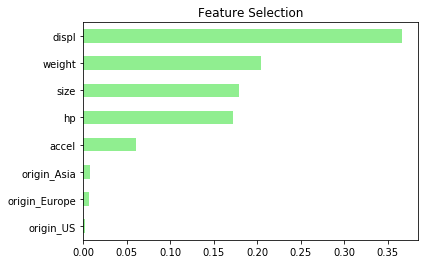

In [28]:
importances_sorted.plot(kind='barh', color="lightgreen")
plt.title('Feature Selection')
plt.show()

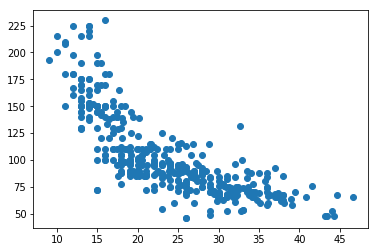

In [29]:
plt.scatter(df["mpg"], df["hp"])

In [46]:
X = df[['displ', 'weight', 'size', 'hp']]
y = df["mpg"]

In [51]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)  

y_pred = LinReg.predict(X_test)
rsquare = LinReg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rsquare, rmse, mse)

0.7313748253408667 3.8890868593547894 15.1249965996061


In [52]:
dt = DecisionTreeRegressor(max_depth=9, criterion="mse", min_samples_leaf=0.16)
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(score, mse)

0.6712462656991057 18.510547716603483
